In [1]:
import pandas as pd 
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [2]:
df= pd.read_csv('G:\credit_risk_dataset.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


- person_age: People age > 100 will be droped.
- person_emp_length: People with employment > 60 years will be droped.
- person_income: Keep people with income < 4mil.

In [7]:
df = df[df['person_age'] <= 100]  
df = df[df['person_emp_length'] <= 60] 
df = df[df['person_income'] <= 4000000]

- person_emp_length contains 895
- loan_int_rate contains 3116

so we fill it

In [8]:
df['person_emp_length'].fillna(df['person_emp_length'].mode()[0], inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

In [9]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31679.000000,3.167900e+04,31679.000000,31679.000000,31679.000000,31679.000000,31679.000000,31679.000000
mean,27.730673,6.649010e+04,4.782064,9659.962436,11.034921,0.215442,0.169610,5.809211
std,6.213427,5.276879e+04,4.034948,6334.360554,3.070205,0.411135,0.106269,4.059710
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.936600e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.160000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


**Counting the number of default loans and non-default loans**

In [10]:
df.loan_status.value_counts()

0    24854
1     6825
Name: loan_status, dtype: int64

In [11]:
df.loan_status.value_counts() / len(df) * 100

0    78.455759
1    21.544241
Name: loan_status, dtype: float64

- Default = 6,825
- Non-default = 24,854,
Percent of non-default loans: 78.46%

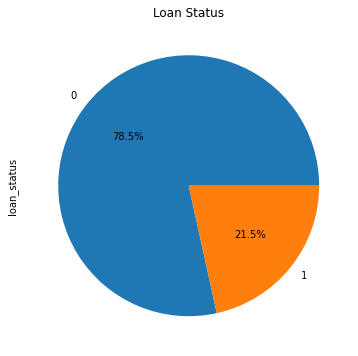

In [12]:
plt.figure(figsize=(10,6))
df['loan_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Loan Status')
plt.show()

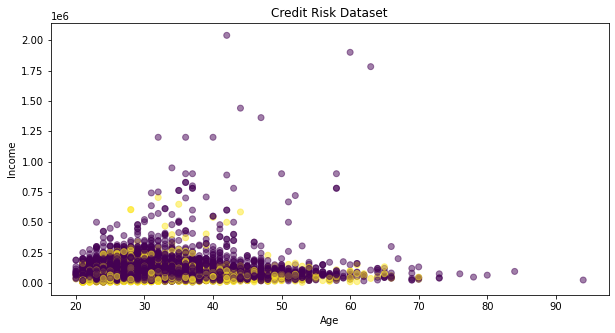

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(df['person_age'], df['person_income'], c=df['loan_status'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Credit Risk Dataset')
plt.show()

<AxesSubplot: xlabel='cb_person_default_on_file', ylabel='count'>

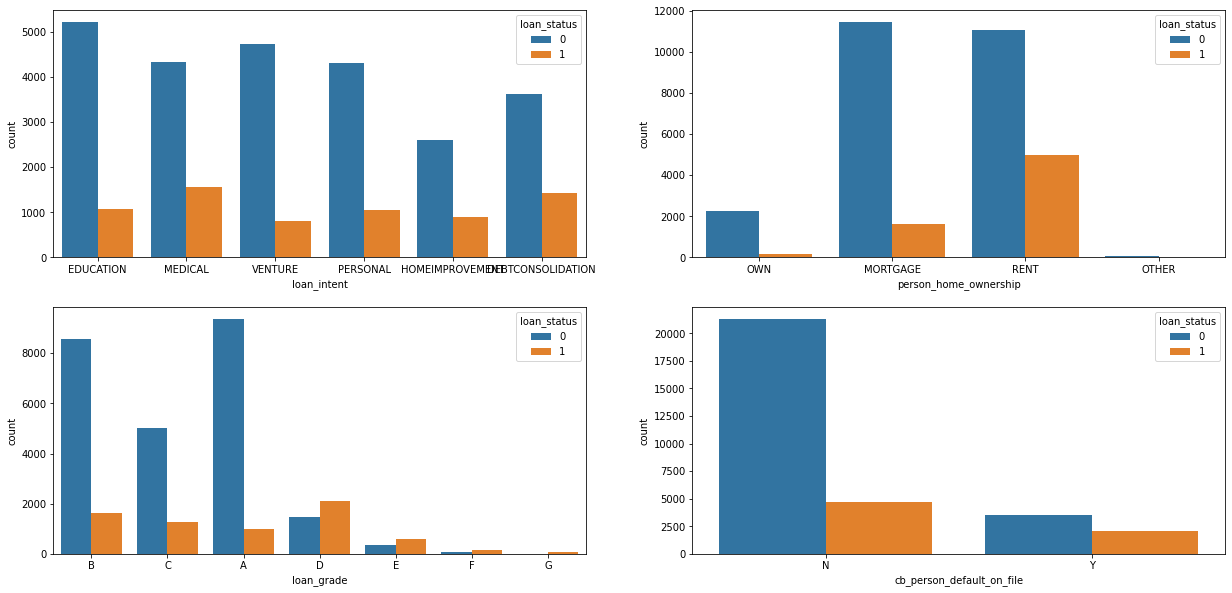

In [14]:
fig,axes = plt.subplots(2,2, figsize=(21,10))
sns.countplot(x=df["loan_intent"], hue=df["loan_status"], ax=axes[0,0])
sns.countplot(x=df["person_home_ownership"], hue=df["loan_status"],ax=axes[0,1])
sns.countplot(x=df["loan_grade"], hue=df["loan_status"],ax=axes[1,0])
sns.countplot(x=df["cb_person_default_on_file"], hue=df["loan_status"],ax=axes[1,1])

# MODELING

In [15]:
target = "loan_status"
predictors = ["person_income", "loan_amnt", "cb_person_cred_hist_length"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[target], test_size=0.3, random_state=42)

In [17]:
from sklearn.metrics import roc_curve,accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression 

In [18]:
LR= LogisticRegression()
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)
y_proba = LR.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_predict)
confusion = confusion_matrix(y_test,y_predict)
print("Confusion matrix:\n", confusion)
Log_report = classification_report(y_test,y_predict)
print(Log_report)

Confusion matrix:
 [[7351  135]
 [1688  330]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      7486
           1       0.71      0.16      0.27      2018

    accuracy                           0.81      9504
   macro avg       0.76      0.57      0.58      9504
weighted avg       0.79      0.81      0.76      9504



In [19]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_tree_predict = DT.predict(X_test)
y_tree_proba = DT.predict_proba(X_test)
confusion = confusion_matrix(y_test,y_tree_predict)
print("Confusion matrix:\n", confusion)
Tree_report= classification_report(y_test,y_tree_predict)
print(Tree_report)

Confusion matrix:
 [[6550  936]
 [ 975 1043]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7486
           1       0.53      0.52      0.52      2018

    accuracy                           0.80      9504
   macro avg       0.70      0.70      0.70      9504
weighted avg       0.80      0.80      0.80      9504



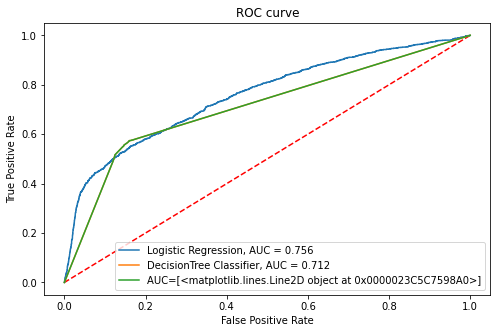

In [31]:
fig = plt.figure(figsize=(8,5))
plt.plot([0, 1], [0, 1],'r--')

#Logistics Regression
pred_proba_lr = LR.predict_proba(X_test)
problr = pred_proba_lr[:, 1]
fpr, tpr, thresh = roc_curve(y_test, problr)
auclr = roc_auc_score(y_test, problr)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclr,3))}')

#DecisionTree Classifier
pred_proba_tree = DT.predict_proba(X_test)
prob_tree = pred_proba_tree[:, 1]
fpr, tpr, thresh = roc_curve(y_test, prob_tree)
aucdt = roc_auc_score(y_test, prob_tree)
plt.plot(fpr, tpr, label=f'DecisionTree Classifier, AUC = {str(round(aucdt,3))}')
plt.title("ROC curve")
plt.plot(fpr,tpr,label=f"AUC={auc}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()